In [3]:
data <- read.csv2('../data//satisfaction_hopital.csv')

##### 1.Transformez la variable « recommander » en une variable binaire « recommander.b » : 
« recommander.b » vaut 0 si « recommander » vaut 0 ou 1 ;
« recommander.b » vaut 1 si « recommander » vaut 2.

In [4]:
str(data)

'data.frame':	534 obs. of  9 variables:
 $ service           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ sexe              : int  0 1 1 0 1 0 0 0 0 1 ...
 $ age               : int  41 29 83 66 84 84 60 85 28 35 ...
 $ profession        : int  4 8 2 3 NA 6 3 3 3 3 ...
 $ amelioration.sante: int  1 2 2 2 NA 3 2 3 3 3 ...
 $ amelioration.moral: int  0 3 1 0 NA 3 1 1 1 2 ...
 $ recommander       : int  1 2 2 2 NA 2 1 2 1 NA ...
 $ score.relation    : int  36 33 40 32 NA 39 31 NA 36 NA ...
 $ score.information : int  22 36 37 35 NA 28 30 NA 29 NA ...


##### 2.A l’aide d’un odds-ratio, estimez la force de l’association entre « recommander.b » et « sexe ». Estimez un intervalle de confiance de cet odds-ratio.

In [17]:
data$sexe <- factor(data$sexe, levels=c(0,1), labels=c('M', 'F')) # coding acc. data description

In [18]:
data$recommander.b <- ifelse(data$recommander==2, 1, 0) # si la variable recommander vaut 2,
                                    # le variable binaire recommander.b vaudra 1, sinon 0

In [76]:
data$recommander.b_b = ifelse(data$recommander==2, 1, 0)

In [20]:
table(data$recommander.b, data$sexe, deparse.level = 2, useNA = 'always') # juste pour vérifier
                    # visuellement à quoi on doit s'attendre en terme d'association des variables
                    # et en nombre d'observations. La tendance est la même dans les 2 cat sexe

                  data$sexe
data$recommander.b   M   F <NA>
              0     73  63    0
              1    139 130    0
              <NA>  56  73    0

In [39]:
prop.table(table(data$recommander.b, data$sexe, deparse.level = 2, useNA = 'always'), 
          margin=2) # tendance se confirmant avec un tableau des fréquences

                  data$sexe
data$recommander.b         M         F <NA>
              0    0.2723881 0.2368421     
              1    0.5186567 0.4887218     
              <NA> 0.2089552 0.2744361     

In [35]:
results_fisher <- fisher.test(data$recommander.b, data$sexe)

In [36]:
results_fisher$estimate # l'odds ratio est très proche de 1, on a donc la même réparition 
        # de la variable recommander.b dans les 2 gorupes de sexe

odds ratio 
  1.083487

In [37]:
results_fisher$conf.int # et son IC contient bien 1.00, 
                    # ainsi les 2 variables ne sont pas indépendantes

[1] 0.7020996 1.6745388
attr(,"conf.level")
[1] 0.95

In [70]:
library(Epi)

In [72]:
twoby2(data$recommander.b, data$sexe)

2 by 2 table analysis: 
------------------------------------------------------ 
Outcome   : M 
Comparing : 0 vs. 1 

    M   F    P(M) 95% conf. interval
0  73  63  0.5368    0.4527   0.6188
1 139 130  0.5167    0.4571   0.5759

                                   95% conf. interval
             Relative Risk: 1.0388    0.8554   1.2615
         Sample Odds Ratio: 1.0837    0.7169   1.6383
Conditional MLE Odds Ratio: 1.0835    0.7021   1.6745
    Probability difference: 0.0200   -0.0824   0.1211

             Exact P-value: 0.7523 
        Asymptotic P-value: 0.703 
------------------------------------------------------


In [81]:
tw=Epi::twoby2(data$recommander.b, data$sexe)
or=round(tw$measures[2,],2)
paste0(or[1], " [", or[2], ";", or[3], "]")

2 by 2 table analysis: 
------------------------------------------------------ 
Outcome   : M 
Comparing : 0 vs. 1 

    M   F    P(M) 95% conf. interval
0  73  63  0.5368    0.4527   0.6188
1 139 130  0.5167    0.4571   0.5759

                                   95% conf. interval
             Relative Risk: 1.0388    0.8554   1.2615
         Sample Odds Ratio: 1.0837    0.7169   1.6383
Conditional MLE Odds Ratio: 1.0835    0.7021   1.6745
    Probability difference: 0.0200   -0.0824   0.1211

             Exact P-value: 0.7523 
        Asymptotic P-value: 0.703 
------------------------------------------------------


[1] "1.08 [0.72;1.64]"

##### 3.Calculez la corrélation (de Pearson) entre « score.relation » et « age ». Testez statistiquement cette corrélation (le script doit inclure la vérification éventuelle des conditions de validité de la méthode utilisée).

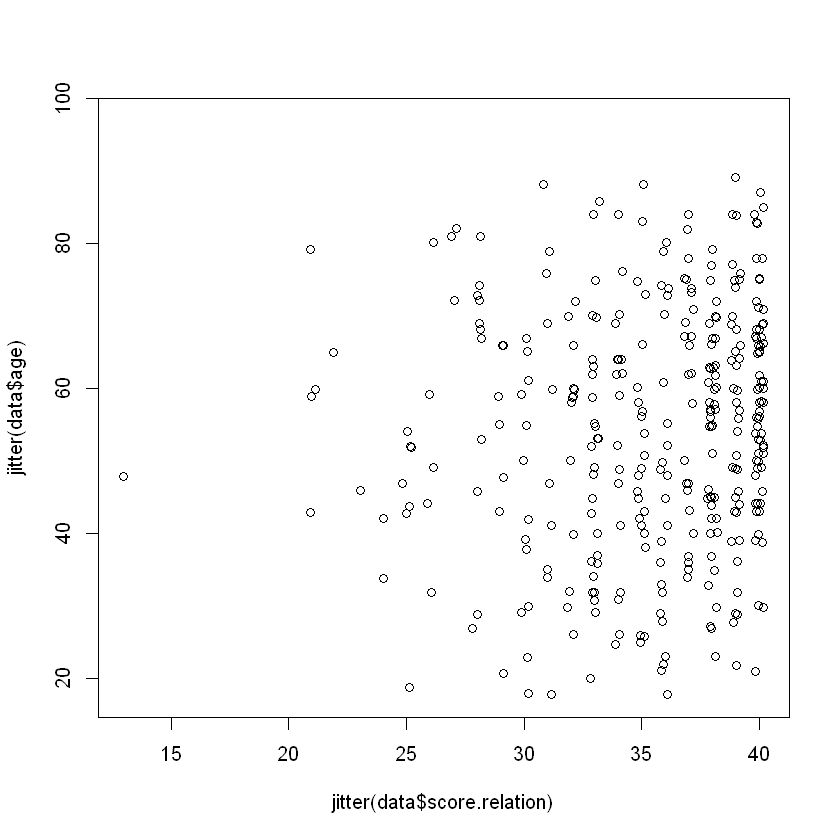

In [54]:
plot(jitter(data$score.relation), jitter(data$age)) # visualisation rapide pour avoir une idée
            # à première vue il n'y pas de corrélation évidente...

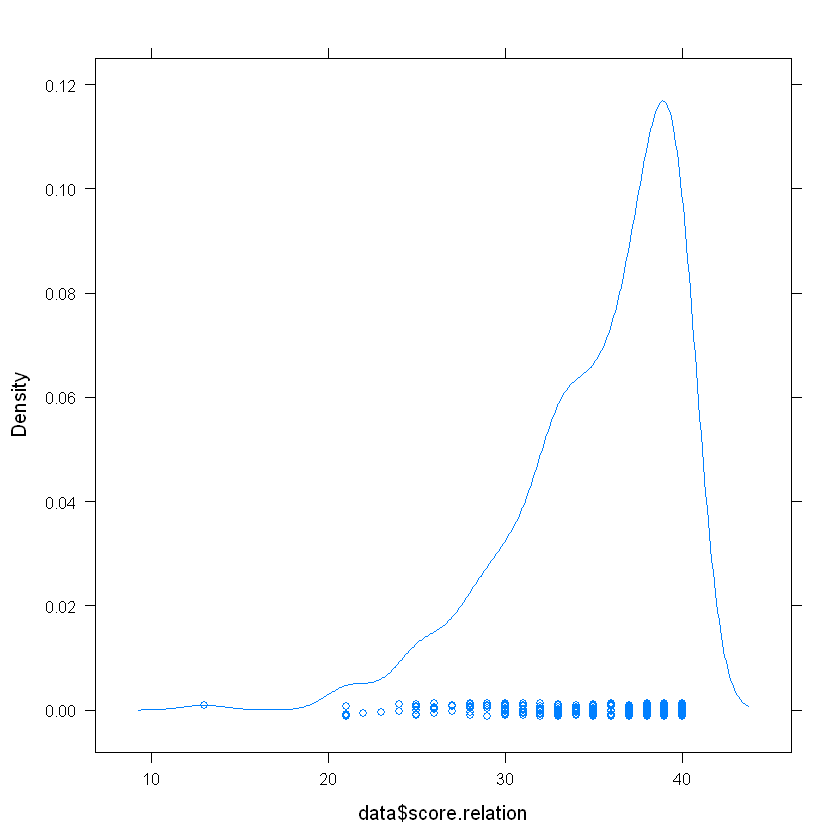

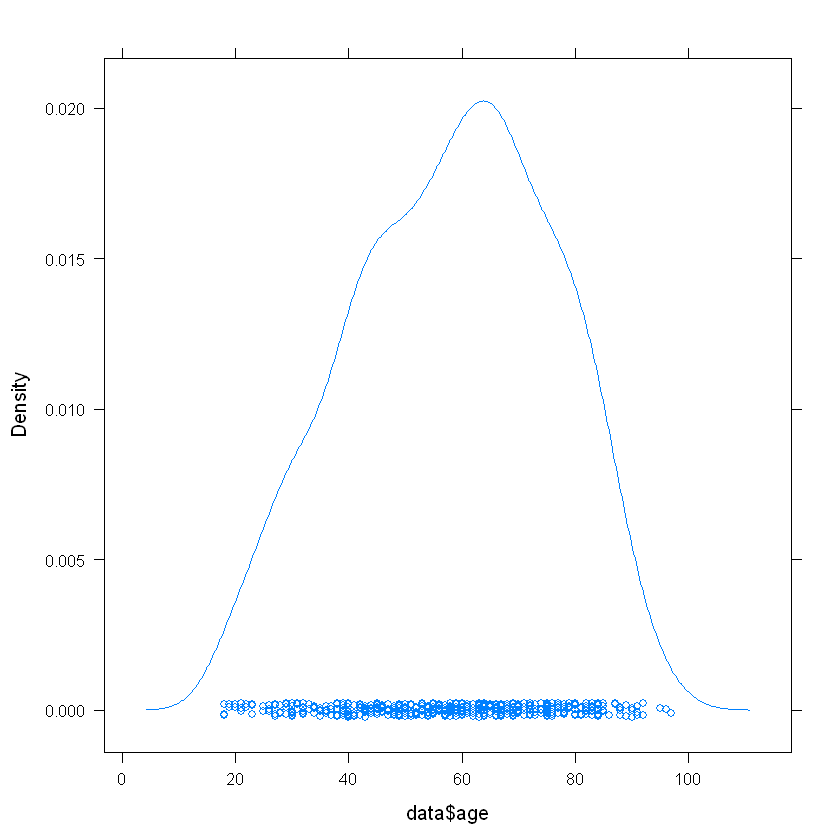

In [85]:
lattice::densityplot(data$score.relation)
lattice::densityplot(data$age)

In [90]:
shapiro.test(data$age) # we must reject H0 of normality


	Shapiro-Wilk normality test

data:  data$age
W = 0.9834, p-value = 1.006e-05


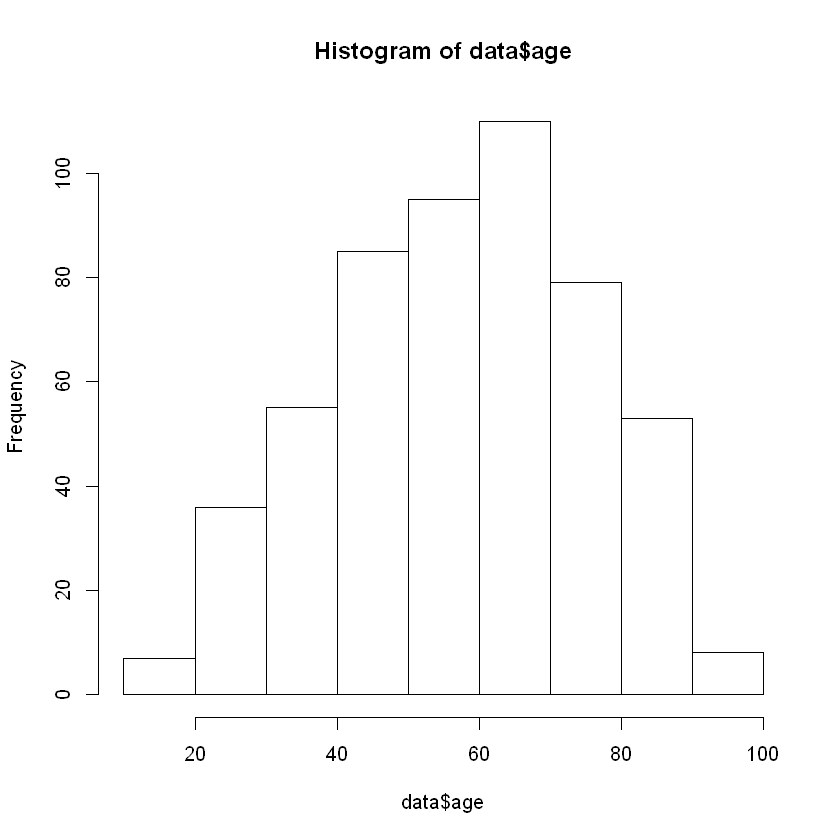

In [61]:
# afin de pouvoir utiliser le test de Pearson, un des échantillons doivent suivre
# une loi normale
hist(data$age) # ça à l'air 'normale'

In [44]:
cor.test(data$score.relation, data$age, use='complete.obs') # mais avec un P > 0.05, le test de
    # nullité du coefficient cor nous indique qu'on ne peut pas rejeter H0
    # ainsi il peut ne pas y avoir de corrélation entre ces 2 variables


	Pearson's product-moment correlation

data:  data$score.relation and data$age
t = 1.796, df = 347, p-value = 0.07336
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.009102243  0.198945290
sample estimates:
       cor 
0.09596955 


In [93]:
cor.test(~score.relation+age, data, method="spearman", exact=F)
#la normalité n'est respectée pour aucune des 2 variables", alors il faudrait plutôt 
#faire une corrélation de Spearman (avec exact=F car il y a des ex-aequo)


	Spearman's rank correlation rho

data:  score.relation and age
S = 6235400, p-value = 0.02513
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1198729 


##### 4.La moyenne du score de relation est-il significativement différent chez les hommes et chez les femmes ? (le script doit inclure la vérification éventuelle des conditions de validité de la méthode utilisée)

In [65]:
# ici nous devons tester si la variance est équivalente pour les 2 groupes
by(data$score.relation, data$sexe, var, na.rm=TRUE) # l'écart entre les variances est minime, OK

data$sexe: M
[1] 20.72353
------------------------------------------------------------ 
data$sexe: F
[1] 22.06747

In [94]:
score.f = data[data$sexe==1,"score.relation"]
score.h = data[data$sexe==0,"score.relation"]
stopifnot(length(score.f)>30, length(score.h)>30)

ERROR: Error in eval(expr, envir, enclos): length(score.f) > 30 is not TRUE


In [75]:
shapiro.test(data$score.relation) # test normalité


	Shapiro-Wilk normality test

data:  data$score.relation
W = 0.87952, p-value = 6.703e-16


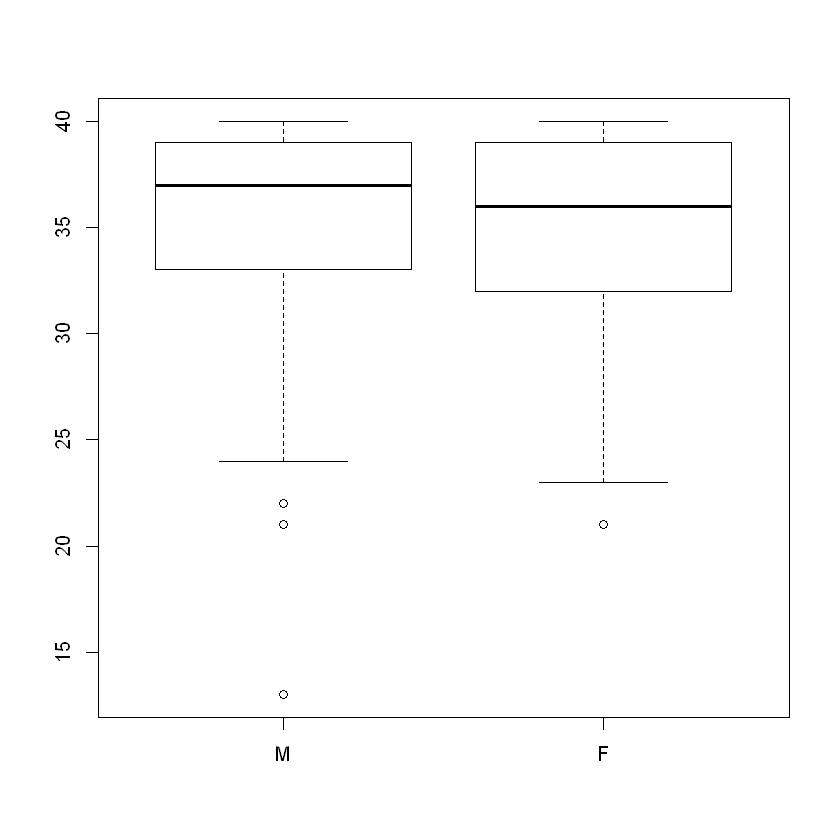

In [69]:
boxplot(score.relation~sexe, data=data) # jetons un oeil avisé à la répartition des données

In [66]:
t.test(data$score.relation~data$sexe, var.equal = TRUE)


	Two Sample t-test

data:  data$score.relation by data$sexe
t = 1.1166, df = 347, p-value = 0.2649
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4212101  1.5275370
sample estimates:
mean in group M mean in group F 
       35.48087        34.92771 


In [ ]:
# ceci conclut notre devoir, ici largement P>0.05, on ne rejette donc pas H0 et on peut
# affirmer qu'il n'y a pas de différence entre les moyennes. Bye_